In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/competitions/birdsong-recognition-cmu/overview")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kokikungimiya
Your Kaggle Key: ··········


100%|██████████| 263M/263M [00:01<00:00, 239MB/s]



Extracting archive ./birdsong-recognition-cmu/birdsong-recognition-cmu.zip to ./birdsong-recognition-cmu


In [ ]:
!pip install librosa

In [ ]:
import librosa
import numpy as np
import pandas as pd
import glob
import os

#  กำหนด path ของโฟลเดอร์ที่เก็บไฟล์ .flac และไฟล์ CSV
audio_folder = "/content/birdsong-recognition-cmu/Data_files/train"
csv_path = "/content/birdsong-recognition-cmu/train.csv"

#  โหลด CSV
df = pd.read_csv(csv_path)

# เพิ่ม "xc" หน้า file_id และแปลงเป็นชื่อไฟล์ .flac
df["file_id"] = "xc" + df["file_id"].astype(str) + ".flac"

# สร้าง dictionary {file_id: genus} เพื่อให้ค้นหาข้อมูลเร็วขึ้น
file_to_label = dict(zip(df["file_id"], df["genus"]))

# ค้นหาไฟล์ .flac ทั้งหมดในโฟลเดอร์
flac_files = glob.glob(os.path.join(audio_folder, "*.flac"))
# โหลดไฟล์เสียงที่ตรงกับ CSV เท่านั้น
audio_data_list = []
sample_rates = []
labels = []
id  = []
for file in flac_files:
    file_name = os.path.basename(file)  # ดึงชื่อไฟล์ เช่น "xc42344.flac"

    if file_name in file_to_label:  # ตรวจสอบว่าอยู่ใน CSV ไหม
        audio_data, sample_rate = librosa.load(file, sr=None)  # sr=None เพื่อคงค่า sample rate เดิม
        audio_data_list.append(audio_data)
        sample_rates.append(sample_rate)
        id.append(file_name)
        labels.append(file_to_label[file_name])  # ดึงค่า genus จาก CSV
    else:
        print(f"ไม่พบ {file_name} ใน CSV")

X = np.array(audio_data_list, dtype=object)  # ใช้ dtype=object เพราะแต่ละไฟล์อาจมีความยาวต่างกัน
y = labels

# Assuming 'id' is the list created in the provided code:
numeric_ids = []
for file_id in id:
    numeric_part = file_id[2:-5] # Extract the numeric part, excluding "xc" and ".flac"
    numeric_ids.append(int(numeric_part))

print(numeric_ids[:5]) # Print the first 5 numeric IDs as an example

# 📌 ตรวจสอบข้อมูล
print("✅ จำนวนไฟล์ที่โหลด:", len(X))
print("✅ ตัวอย่าง labels:", y[:5])
print("✅ ตัวอย่าง sample rates:", sample_rates[:5])


[96608, 42343, 164926, 145533, 130993]
✅ จำนวนไฟล์ที่โหลด: 54
✅ ตัวอย่าง labels: ['Turdus', 'Pluvialis', 'Poecile', 'Emberiza', 'Columba']
✅ ตัวอย่าง sample rates: [44100, 44100, 44100, 44100, 44100]


In [ ]:
import pandas as pd

# สร้าง DataFrame จาก X และ y
df_train = pd.DataFrame(numeric_ids, columns=['id'])  # แปลง X เป็น DataFrame, กำหนดชื่อคอลัมน์เป็น 'id'
df_train['genus'] = y  # เพิ่มคอลัมน์ 'label' จาก y
df_train['X'] = X
df_train = df_train.set_index('id')
# ตรวจสอบผลลัพธ์
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 96608 to 102869
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genus   54 non-null     object
 1   X       54 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [ ]:
import librosa
import numpy as np
import pandas as pd
import glob
import os

#  กำหนด path ของโฟลเดอร์ที่เก็บไฟล์ .flac และไฟล์ CSV
audio_folder = "/content/birdsong-recognition-cmu/Data_files/test"
csv_path = "/content/birdsong-recognition-cmu/test.csv"

#  โหลด CSV
df = pd.read_csv(csv_path)

# เพิ่ม "xc" หน้า file_id และแปลงเป็นชื่อไฟล์ .flac
df["file_id"] = "xc" + df["file_id"].astype(str) + ".flac"

# สร้าง dictionary {file_id: genus} เพื่อให้ค้นหาข้อมูลเร็วขึ้น
file_to_label = dict(zip(df["file_id"], df["genus"]))

# ค้นหาไฟล์ .flac ทั้งหมดในโฟลเดอร์
flac_files = glob.glob(os.path.join(audio_folder, "*.flac"))
# โหลดไฟล์เสียงที่ตรงกับ CSV เท่านั้น
audio_data_list = []
sample_rates = []
labels = []
id  = []
for file in flac_files:
    file_name = os.path.basename(file)  # ดึงชื่อไฟล์ เช่น "xc42344.flac"

    if file_name in file_to_label:  # ตรวจสอบว่าอยู่ใน CSV ไหม
        audio_data, sample_rate = librosa.load(file, sr=None)  # sr=None เพื่อคงค่า sample rate เดิม
        audio_data_list.append(audio_data)
        sample_rates.append(sample_rate)
        id.append(file_name)
        labels.append(file_to_label[file_name])  # ดึงค่า genus จาก CSV
    else:
        print(f"ไม่พบ {file_name} ใน CSV")

X = np.array(audio_data_list, dtype=object)  # ใช้ dtype=object เพราะแต่ละไฟล์อาจมีความยาวต่างกัน

# Assuming 'id' is the list created in the provided code:
numeric_ids = []
for file_id in id:
    numeric_part = file_id[2:-5] # Extract the numeric part, excluding "xc" and ".flac"
    numeric_ids.append(int(numeric_part))

print(numeric_ids[:5]) # Print the first 5 numeric IDs as an example

# 📌 ตรวจสอบข้อมูล
print("✅ จำนวนไฟล์ที่โหลด:", len(X))
print("✅ ตัวอย่าง sample rates:", sample_rates[:5])


[101933, 89994, 101940, 101862, 146260]
✅ จำนวนไฟล์ที่โหลด: 54
✅ ตัวอย่าง sample rates: [44100, 44100, 44100, 44100, 44100]


In [ ]:
import pandas as pd

# สร้าง DataFrame จาก X และ y
df_test = pd.DataFrame(numeric_ids, columns=['id'])  # แปลง X เป็น DataFrame, กำหนดชื่อคอลัมน์เป็น 'id'
df_test['X'] = X
df_test = df_test.set_index('id')
# ตรวจสอบผลลัพธ์
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 101933 to 146756
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       54 non-null     object
dtypes: object(1)
memory usage: 864.0+ bytes


In [ ]:
# ตรวจสอบว่า 'genus' อยู่ในคอลัมน์ของ DataFrame หรือไม่
if 'genus' in df.columns:
    genus_mapping = {
        "Acrocephalus": 0,
        "Anthus": 1,
        "Columba": 2,
        "Corvus": 3,
        "Emberiza": 4,
        "Motacilla": 5,
        "Passer": 6,
        "Phylloscopus": 7,
        "Pluvialis": 8,
        "Poecile": 9,
        "Streptopelia": 10,
        "Sylvia": 11,
        "Tringa": 12,
        "Turdus": 13
    }

    # แปลงค่าในคอลัมน์ 'genus' ตาม mapping
    df_train['genus'] = df_train['genus'].map(genus_mapping)

# ตรวจสอบ DataFrame
print(df_train)


        genus                                                  X
id                                                              
96608      13  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
42343       8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
164926      9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
145533      4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
130993      2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
42344       8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
96133       3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
102107      4  [0.0, -3.0517578e-05, 0.0, 0.0, 0.0, 0.0, 0.0,...
101941     10  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
94958      13  [0.0, -3.0517578e-05, 0.0, 0.0, 0.0, 0.0, 0.0,...
69792       5  [0.0, 0.0, 0.0, -3.0517578e-05, 0.0, 0.0, 0.0,...
94615       2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
41428       5  [0.0, -3.0517578e-05, 0.0, 0.0, 0.0, 0.0, 0.0,...
92264       2  [0.0, -3.0

In [ ]:
X = df_train['X']
y_lable = df_train.drop('X', axis=1)


In [ ]:
X

,X
id,
96608,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
42343,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
164926,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
145533,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
130993,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
42344,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
96133,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
102107,"[0.0, -3.0517578e-05, 0.0, 0.0, 0.0, 0.0, 0.0,..."
101941,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
y_lable

,genus
id,
96608,13
42343,8
164926,9
145533,4
130993,2
42344,8
96133,3
102107,4
101941,10


In [ ]:
df_train

,genus,X
id,,
96608,13,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
42343,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
164926,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
145533,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
130993,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
42344,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
96133,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
102107,4,"[0.0, -3.0517578e-05, 0.0, 0.0, 0.0, 0.0, 0.0,..."
101941,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


#random

In [ ]:
import librosa
import numpy as np

def extract_features(audio_data):
    # Extract features using librosa
    # Example: MFCCs
    mfccs = librosa.feature.mfcc(y=audio_data, sr=22050, n_mfcc=13)
    mfccs_scaled = np.mean(mfccs.T, axis=0) # Calculate the mean of each MFCC coefficient across frames

    # You can add more features here if needed

    return mfccs_scaled

# Apply the feature extraction function to your data
X_features = np.array([extract_features(audio) for audio in X])

# Now you can use X_features to train your model:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_features, y)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
import librosa

def extract_features(audio_data, sr=22050):
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
    contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=audio_data)

    # Flatten and concatenate all features
    features = np.hstack([
        np.mean(mfccs, axis=1),
        np.mean(chroma, axis=1),
        np.mean(contrast, axis=1),
        np.mean(zcr, axis=1)
    ])
    return features

# Extract features
X_features = np.array([extract_features(audio) for audio in X])


In [ ]:
import librosa
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#
# Split dataset into train and test (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



#spectro gram

In [ ]:
pip install librosa soundfile

In [ ]:
pip install transformers datasets torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

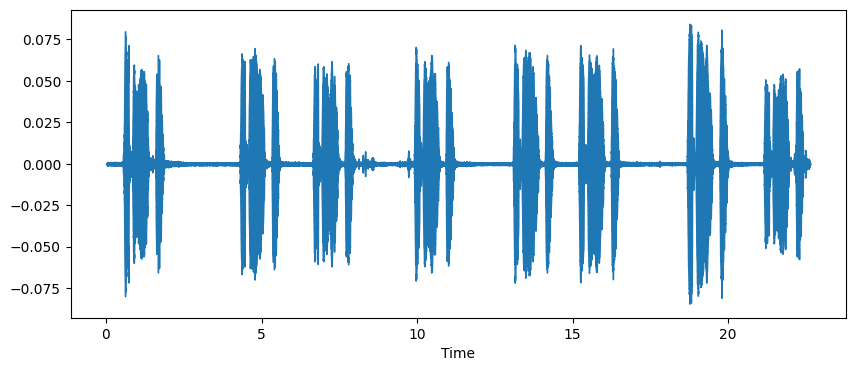

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load .flac file
file_path = "/content/birdsong-recognition-cmu/Data_files/train/xc101941.flac"
y, sr = librosa.load(file_path, sr=None)  # Keep original sampling rate

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
# plt.title("Waveform of Birdsong")
plt.show()

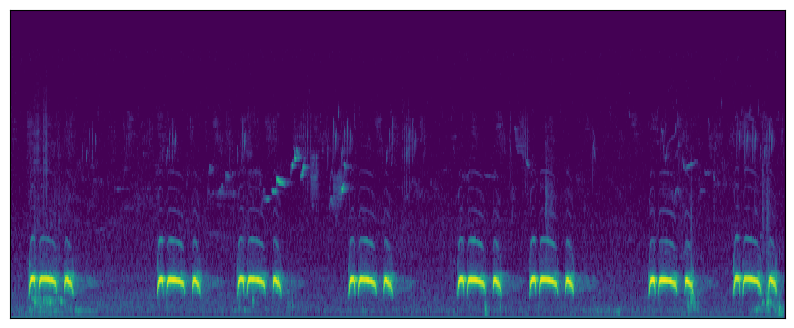

In [ ]:
import numpy as np

# Compute Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to decibels

# Plot spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, cmap='viridis')
# librosa.display.specshow(mel_spec_db, cmap='viridis')
# plt.colorbar(label='dB')
# plt.title("Mel Spectrogram")
plt.show()


In [ ]:
import os
import torch
import pandas as pd
import librosa
import numpy as np
from transformers import ASTFeatureExtractor, ASTForAudioClassification
from datasets import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder


In [ ]:
AUDIO_FOLDER = "/content/birdsong-recognition-cmu/Data_files/train"
TEST_FOLDER = "/content/birdsong-recognition-cmu/Data_files/test"
CSV_FILE = "/content/birdsong-recognition-cmu/train.csv"
SUBMISSION_FILE = "/content/birdsong-recognition-cmu/train.csv"
OUTPUT_FILE = "Submission_6.csv"

# โหลดข้อมูล CSV
df = pd.read_csv(CSV_FILE)

# ==================== 📌 2. เตรียม Label Encoding ====================
label_encoder = LabelEncoder()
df["genus_encoded"] = label_encoder.fit_transform(df["genus"])
num_labels = len(label_encoder.classes_)  # จำนวนคลาสทั้งหมด

In [ ]:
feature_extractor = ASTFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model = ASTForAudioClassification.from_pretrained(
    "MIT/ast-finetuned-audioset-10-10-0.4593",
    num_labels=num_labels,
    ignore_mismatched_sizes=True  # ✅ แก้ปัญหา size mismatch
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()


Some weights of ASTForAudioClassification were not initialized from the model checkpoint at MIT/ast-finetuned-audioset-10-10-0.4593 and are newly initialized because the shapes did not match:
- classifier.dense.bias: found shape torch.Size([527]) in the checkpoint and torch.Size([14]) in the model instantiated
- classifier.dense.weight: found shape torch.Size([527, 768]) in the checkpoint and torch.Size([14, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ASTForAudioClassification(
  (audio_spectrogram_transformer): ASTModel(
    (embeddings): ASTEmbeddings(
      (patch_embeddings): ASTPatchEmbeddings(
        (projection): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ASTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ASTLayer(
          (attention): ASTSdpaAttention(
            (attention): ASTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ASTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ASTIntermediate(
       

In [ ]:
import os
import librosa
import numpy as np
from tqdm import tqdm  # Progress bar

# Directory containing audio files
# data_dir = "/content/birdsong-recognition-cmu/Data_files/train"

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)  # โหลดเสียง
    y = librosa.resample(y, orig_sr=sr, target_sr=16000)  # ✅ บังคับ Sample Rate เป็น 16kHz
    inputs = feature_extractor(y, sampling_rate=16000, return_tensors="pt")
    return inputs.input_values[0]


# # Process all .flac files
# features = []
# labels = []
# file_paths = []

# for file_name in tqdm(os.listdir(data_dir)):
#     if file_name.endswith(".flac"):
#         file_path = os.path.join(data_dir, file_name)
#         mfcc_features = extract_features(file_path)

#         features.append(mfcc_features)
#         labels.append(file_name)  # You may need actual labels if available
#         file_paths.append(file_path)

# # Convert to NumPy array
# X = np.array(features)
# y = np.array(labels)  # Placeholder labels (replace with actual labels if needed)

# print("Feature shape:", X.shape)
# print("Sample label:", y[0])


In [ ]:
import pandas as pd

df = pd.DataFrame(X)
df["file_name"] = y  # Add file names for reference
df.to_csv("/content/birdsong_features.csv", index=False)

print("Features saved to birdsong_features.csv")


Features saved to birdsong_features.csv


In [ ]:
birdsong_features = pd.read_csv('/content/birdsong_features.csv')
birdsong_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,file_name
0,-445.90662,66.895820,-43.595203,4.624255,-8.314947,-12.110644,0.530062,3.384335,14.281883,10.097584,-5.656866,5.383601,9.489965,xc96608.flac
1,-517.12067,60.673980,-51.028755,16.996256,14.007464,38.978706,-13.045378,-6.333472,-15.007119,13.218476,-22.324420,-20.415030,-7.060558,xc42343.flac
2,-503.72130,-53.918762,-67.796450,78.194240,-12.307402,-16.199997,4.588867,-3.473863,11.197501,-6.316717,1.667327,-5.346997,4.643442,xc164926.flac
3,-408.95770,74.606100,-18.845476,14.375772,8.891081,-21.228815,0.949834,1.958254,-20.946823,-14.256376,-9.297135,-12.545014,-4.032087,xc145533.flac
4,-381.93253,123.980644,-15.755365,49.334408,-0.050654,-26.498232,11.917198,3.084256,-10.587765,-9.910374,-14.258940,-2.509516,2.472059,xc130993.flac
5,-517.72640,56.319300,-48.160570,9.221738,11.139434,28.331907,-8.431635,-2.620015,-8.693367,8.819039,-22.990993,-20.616201,-5.857704,xc42344.flac
6,-411.36444,86.723820,-55.865425,18.627026,-28.568443,-13.046791,-24.889230,6.408585,-12.751681,-7.027320,-15.824022,0.061965,-9.225282,xc96133.flac
7,-685.67520,-40.490295,-59.992640,35.404343,7.929729,-0.176629,-1.152293,8.357221,-20.667946,7.788456,9.026175,-0.428833,-0.658067,xc102107.flac
8,-640.26855,76.975464,43.310715,27.530535,15.325435,-0.104784,-7.094688,-9.209128,-12.686703,-12.127469,-9.358770,-8.672263,-5.536383,xc101941.flac
9,-522.68190,-4.124711,-123.218000,-36.416290,27.022990,58.198498,5.585835,-10.154253,-22.934116,-11.225938,4.473424,7.405250,12.005188,xc94958.flac


In [ ]:
train_data = []
train_labels = []

for _, row in df.iterrows():
    file_id = row["file_id"]
    genus_encoded = row["genus_encoded"]
    file_path = os.path.join(AUDIO_FOLDER, f"xc{file_id}.flac")

    if os.path.exists(file_path):
        feature = extract_features(file_path)
        train_data.append(feature.numpy())
        train_labels.append(genus_encoded)

train_data = torch.tensor(np.array(train_data))
train_labels = torch.tensor(train_labels)


In [ ]:
dataset = Dataset.from_dict({"input_values": train_data, "labels": train_labels})

In [ ]:
def collate_fn(batch):
    input_values = torch.stack([torch.tensor(item["input_values"]) for item in batch])
    labels = torch.tensor([item["labels"] for item in batch])
    return {"input_values": input_values, "labels": labels}

dataloader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

model.train()
for epoch in range(10):  # ✅ ลดจำนวน Epoch เพื่อความเร็ว
    for batch in dataloader:
        inputs = batch["input_values"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model(inputs).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1} Loss: {loss.item():.4f}")


KeyboardInterrupt: 

In [ ]:
# ==================== 📌 7. ทำนายข้อมูล Test & สร้างไฟล์ Submission ====================
df_submission = pd.read_csv(SUBMISSION_FILE)

for index, row in df_submission.iterrows():
    file_id = row["file_id"]
    file_path = os.path.join(TEST_FOLDER, f"xc{file_id}.flac")

    if os.path.exists(file_path):
        feature = extract_features(file_path).to(device)
        with torch.no_grad():
            output = model(feature.unsqueeze(0)).logits
        predicted_index = torch.argmax(output, dim=1).item()
        predicted_label = label_encoder.inverse_transform([predicted_index])[0]
        df_submission.at[index, "genus"] = predicted_label

# ==================== 📌 8. บันทึกไฟล์ Submission ====================
df_submission.to_csv(OUTPUT_FILE, index=False)
print(f"📄 Submission file saved: {OUTPUT_FILE}")

📄 Submission file saved: Submission_6.csv


In [ ]:
sub = pd.read_csv('/content/birdsong-recognition-cmu/Sample_submission.csv')
sub

,file_id,genus
0,27145,Corvus
1,101862,Phylloscopus
2,75092,NaN
3,42224,NaN
4,101940,NaN
5,102048,NaN
6,116226,NaN
7,83912,NaN
8,64735,NaN
9,82971,NaN


In [ ]:
df_submission

,file_id,genus
0,71748,Phylloscopus
1,94958,Turdus
2,125777,Emberiza
3,143002,Corvus
4,82715,Acrocephalus
5,135521,Sylvia
6,145533,Emberiza
7,120664,Acrocephalus
8,102868,Tringa
9,85842,Pluvialis


In [ ]:
# Extract numeric ID from file_name (e.g., "xc96608.flac" → 96608)
birdsong_features["id"] = birdsong_features["file_name"].str.extract(r'xc(\d+)\.flac').astype(int)

# Merge genus using ID
birdsong_features = birdsong_features.merge(y_lable, left_on="id", right_index=True, how="left")

# Drop the 'id' column if not needed
birdsong_features.drop(columns=["id"], inplace=True)

print(birdsong_features.head())  # Check the result

           0           1          2          3          4          5  \
0 -445.90662   66.895820 -43.595207   4.624255  -8.314947 -12.110644   
1 -517.12067   60.673980 -51.028755  16.996256  14.007464  38.978706   
2 -503.72130  -53.918762 -67.796450  78.194240 -12.307402 -16.199997   
3 -408.95770   74.606100 -18.845476  14.375772   8.891081 -21.228815   
4 -381.93253  123.980644 -15.755365  49.334408  -0.050653 -26.498230   

           6         7          8          9         10         11        12  \
0   0.530062  3.384335  14.281883  10.097584  -5.656866   5.383601  9.489965   
1 -13.045378 -6.333472 -15.007119  13.218476 -22.324420 -20.415030 -7.060558   
2   4.588867 -3.473863  11.197501  -6.316717   1.667327  -5.346997  4.643442   
3   0.949834  1.958254 -20.946823 -14.256376  -9.297135 -12.545014 -4.032087   
4  11.917198  3.084256 -10.587765  -9.910374 -14.258940  -2.509517  2.472058   

       file_name  genus  
0   xc96608.flac     13  
1   xc42343.flac      8  
2  xc164

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features (X) and labels (y)
X = birdsong_features.drop(columns=["file_name", "genus"])  # Drop non-numeric columns
y = birdsong_features["genus"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data ready for training!")


Data ready for training!


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict
y_pred = rf_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 0.0909


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Separate features and labels
X = birdsong_features.drop(columns=["file_name", "genus"]).values
y = birdsong_features["genus"].values

# Reshape for CNN input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data reshaped and ready for training!")


Data reshaped and ready for training!


In [ ]:
model = Sequential([
    Conv1D(128, kernel_size=5, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),

    LSTM(128, return_sequences=True),
    LSTM(64),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(len(np.unique(y_train)), activation='softmax')  # Multiclass classification
])

# Reduce learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)                   │ (None, 9, 128)              │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 4, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 2, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 1, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 14)                  │             462 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,942 (691.18 KB)

 Trainable params: 176,558 (689.68 KB)

 Non-trainable params: 384 (1.50 KB)

None


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])

# Evaluate
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = np.mean(y_pred_classes == y_test)
print(f"Deep Learning Accuracy: {accuracy:.4f}")


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 513ms/step - accuracy: 0.1088 - loss: 2.6375 - val_accuracy: 0.0000e+00 - val_loss: 2.6432 - learning_rate: 0.0010
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2488 - loss: 2.6170 - val_accuracy: 0.0000e+00 - val_loss: 2.6429 - learning_rate: 0.0010
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4094 - loss: 2.6003 - val_accuracy: 0.0000e+00 - val_loss: 2.6471 - learning_rate: 0.0010
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2539 - loss: 2.5967 - val_accuracy: 0.0000e+00 - val_loss: 2.6489 - learning_rate: 0.0010
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4041 - loss: 2.5773 - val_accuracy: 0.0000e+00 - val_loss: 2.6482 - learning_rate: 0.0010
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4353 - loss: 2.5600 - val_accuracy: 0.0000e+00 - val_loss: 2.6486 - learning_rate: 0.0010
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4249 - loss: 2.549

#image classification

In [ ]:
y_lable

,genus
id,
96608,13
42343,8
164926,9
145533,4
130993,2
42344,8
96133,3
102107,4
101941,10


In [ ]:
# prompt: from y_lable map id  like from 121601 become xc121601.flac

# Assuming 'y_lable' is your DataFrame with 'genus' column and index as numeric IDs

def map_id_to_filename(numeric_id):
  """Maps a numeric ID to the corresponding filename format."""
  return f"/content/xc{numeric_id}_spectrogram.png"

# Apply the function to your DataFrame index (numeric IDs)
y_lable['filename'] = y_lable.index.map(map_id_to_filename)

print(y_lable.head())


        genus                           filename
id                                              
96608      13   /content/xc96608_spectrogram.png
42343       8   /content/xc42343_spectrogram.png
164926      9  /content/xc164926_spectrogram.png
145533      4  /content/xc145533_spectrogram.png
130993      2  /content/xc130993_spectrogram.png


In [ ]:
y_lable

,genus,filename
id,,
96608,13,/content/xc96608_spectrogram.png
42343,8,/content/xc42343_spectrogram.png
164926,9,/content/xc164926_spectrogram.png
145533,4,/content/xc145533_spectrogram.png
130993,2,/content/xc130993_spectrogram.png
42344,8,/content/xc42344_spectrogram.png
96133,3,/content/xc96133_spectrogram.png
102107,4,/content/xc102107_spectrogram.png
101941,10,/content/xc101941_spectrogram.png


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image # Import the Image module from PIL


def audio_to_image(audio_path):
    """
    Convert a sound file to a spectrogram image and save it with a default name.

    Parameters:
    - audio_path: Path to the audio file (e.g., '.flac', '.wav').

    Returns:
    - None
    """
    # Extract file name without extension for image name
    file_name = os.path.splitext(os.path.basename(audio_path))[0]

    # Load the audio file using librosa
    y, sr = librosa.load(audio_path, sr=None)  # sr=None keeps the original sample rate

    # Generate a Mel spectrogram
    # Removed 'n_mfcc' as it's not a valid argument for melspectrogram
    # You can specify 'n_mels' to control the number of Mel bands if needed
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    # Convert the spectrogram to decibels
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot and save the spectrogram
    plt.figure(figsize=(10, 4))
    # librosa.display.specshow(log_spectrogram, x_axis='time', y_axis='mel', sr=sr)
    librosa.display.specshow(log_spectrogram)
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('Mel Spectrogram')

    # Save the spectrogram as an image with default naming convention
    image_path = f"{file_name}_spectrogram.png"
    plt.savefig(image_path, bbox_inches='tight')
    plt.close()

    print(f"Spectrogram image saved as: {image_path}")
    return image_path
# Example usage
audio_file = '/content/birdsong-recognition-cmu/Data_files/train/xc101935.flac'
audio_to_image(audio_file)

# open_image = Image.open('/content/' + image_path)
# open_image.show()

Spectrogram image saved as: xc101935_spectrogram.png


'xc101935_spectrogram.png'

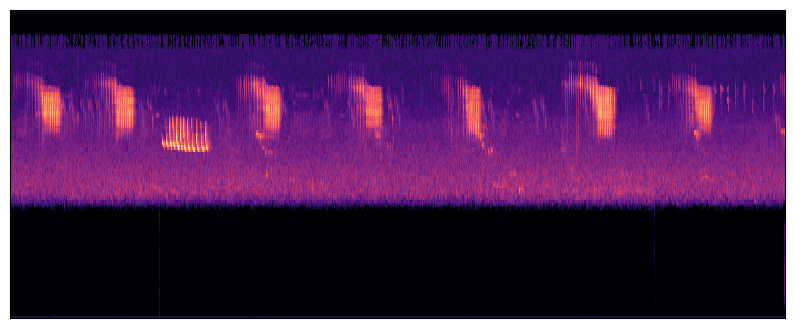

In [ ]:
# prompt: open image xc101935_spectrogram.png

from PIL import Image
Image.open('/content/xc101935_spectrogram.png')


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os


def audio_to_image(audio_path):
    """
    Convert a sound file to a spectrogram image and save it with a default name.

    Parameters:
    - audio_path: Path to the audio file (e.g., '.flac', '.wav').

    Returns:
    - None
    """
    # Extract file name without extension for image name
    file_name = os.path.splitext(os.path.basename(audio_path))[0]

    # Load the audio file using librosa
    y, sr = librosa.load(audio_path, sr=None)  # sr=None keeps the original sample rate

    # Generate a Mel spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    # Convert the spectrogram to decibels
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot and save the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram)
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('Mel Spectrogram')

    # Save the spectrogram as an image with default naming convention
    image_path = f"{file_name}_spectrogram.png"
    plt.savefig(image_path, bbox_inches='tight')
    plt.close()

    print(f"Spectrogram image saved as: {image_path}")
    return image_path


def generate_spectrograms_for_folder(folder_path):
    """
    Generate spectrogram images for all audio files in the specified folder.

    Parameters:
    - folder_path: Path to the folder containing audio files.

    Returns:
    - None
    """
    audio_files = [f for f in os.listdir(folder_path) if f.endswith(('.flac', '.wav'))]

    for audio_file in audio_files:
        audio_path = os.path.join(folder_path, audio_file)
        audio_to_image(audio_path)

# Example usage
folder_path = '/content/birdsong-recognition-cmu/Data_files/train'
generate_spectrograms_for_folder(folder_path)


Spectrogram image saved as: xc96608_spectrogram.png
Spectrogram image saved as: xc42343_spectrogram.png
Spectrogram image saved as: xc164926_spectrogram.png
Spectrogram image saved as: xc145533_spectrogram.png
Spectrogram image saved as: xc130993_spectrogram.png
Spectrogram image saved as: xc42344_spectrogram.png
Spectrogram image saved as: xc96133_spectrogram.png
Spectrogram image saved as: xc102107_spectrogram.png
Spectrogram image saved as: xc101941_spectrogram.png
Spectrogram image saved as: xc94958_spectrogram.png
Spectrogram image saved as: xc69792_spectrogram.png
Spectrogram image saved as: xc94615_spectrogram.png
Spectrogram image saved as: xc41428_spectrogram.png
Spectrogram image saved as: xc92264_spectrogram.png
Spectrogram image saved as: xc94964_spectrogram.png
Spectrogram image saved as: xc121168_spectrogram.png
Spectrogram image saved as: xc27999_spectrogram.png
Spectrogram image saved as: xc121677_spectrogram.png
Spectrogram image saved as: xc55184_spectrogram.png
Spect

In [ ]:
# prompt: split y_lable fortrain daya

# Assuming y_lable is your DataFrame
# Split y_lable into training and testing sets
from sklearn.model_selection import train_test_split

X_train, x_test = train_test_split(y_lable, test_size=0.2, random_state=42) # Adjust test_size as needed

print("x_train shape:", X_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (43, 2)
x_test shape: (11, 2)


In [ ]:
# prompt: split x and y x_train shape: (43, 2)
# x_test shape: (11, 2)

# Assuming X_train and x_test are your DataFrames
# Extract the 'genus' column as y_train and y_test
y_train = X_train['genus']
y_test = x_test['genus']

# Extract the 'filename' column as x_train and x_test (assuming it exists)
x_train = X_train['filename']
x_test = x_test['filename']

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (43,)
x_test shape: (11,)
y_train shape: (43,)
y_test shape: (11,)


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

# # เพิ่ม Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# ใช้ Dropout ในโมเดล
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout สำหรับ regularization
x = Dense(14, activation='softmax')(x) # Changed to 20 units with softmax activation
model = Model(inputs=base_model.input, outputs=x)
# Compile โมเดล
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
# Loss should be categorical_crossentropy for multi-class classification
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Load and preprocess images for training
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Load image with target size
    x = image.img_to_array(img)  # Convert image to NumPy array
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    x = tf.keras.applications.efficientnet.preprocess_input(x)  # Preprocess using EfficientNet's preprocessing function
    return x

x_train_images = np.vstack([load_and_preprocess_image(img_path) for img_path in x_train])

# คำนวณ class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)

# แปลงเป็น dictionary
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Convert labels to one-hot encoding for categorical_crossentropy loss
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train)

# Train โมเดลด้วย Data Augmentation using preprocessed images
history = model.fit(
    x_train_images, # Pass your training images here
    y_train_onehot, # Pass one-hot encoded labels here
    epochs=30,
    class_weight=class_weights_dict
)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 113s 33s/step - accuracy: 0.0933 - loss: 2.5978
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.1296 - loss: 2.6415
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2125 - loss: 2.4491
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3421 - loss: 2.2293
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4145 - loss: 2.2313
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6529 - loss: 1.9407
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7619 - loss: 1.7858
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6996 - loss: 1.8579
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7616 - loss: 1.5948
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7774 - loss: 1.5338
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8239 - loss: 1.3910
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9327 - loss: 1.3207


In [ ]:
history = model.fit(
    x_train_images, # Pass your training images here
    y_train_onehot, # Pass one-hot encoded labels here
    epochs=50,
    class_weight=class_weights_dict
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 6.5336e-04
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.0030
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 5.1203e-04
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 9.6071e-04
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 8.1852e-04
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000

#Prediction classi

In [ ]:
folder_path = '/content/birdsong-recognition-cmu/Data_files/test'
generate_spectrograms_for_folder(folder_path)

Spectrogram image saved as: xc101933_spectrogram.png
Spectrogram image saved as: xc89994_spectrogram.png
Spectrogram image saved as: xc101940_spectrogram.png
Spectrogram image saved as: xc101862_spectrogram.png
Spectrogram image saved as: xc146260_spectrogram.png
Spectrogram image saved as: xc27962_spectrogram.png
Spectrogram image saved as: xc146755_spectrogram.png
Spectrogram image saved as: xc46032_spectrogram.png
Spectrogram image saved as: xc146757_spectrogram.png
Spectrogram image saved as: xc102048_spectrogram.png
Spectrogram image saved as: xc102803_spectrogram.png
Spectrogram image saved as: xc72861_spectrogram.png
Spectrogram image saved as: xc151150_spectrogram.png
Spectrogram image saved as: xc30614_spectrogram.png
Spectrogram image saved as: xc64735_spectrogram.png
Spectrogram image saved as: xc132392_spectrogram.png
Spectrogram image saved as: xc101932_spectrogram.png
Spectrogram image saved as: xc41816_spectrogram.png
Spectrogram image saved as: xc99529_spectrogram.png
S

In [ ]:
cample_submis = pd.read_csv('/content/birdsong-recognition-cmu/Sample_submission.csv')
cample_submis

,file_id,genus
0,27145,Corvus
1,101862,Phylloscopus
2,75092,NaN
3,42224,NaN
4,101940,NaN
5,102048,NaN
6,116226,NaN
7,83912,NaN
8,64735,NaN
9,82971,NaN


In [ ]:
def map_id_to_filename(numeric_id):
  """Maps a numeric ID to the corresponding filename format."""
  return f"/content/xc{numeric_id}_spectrogram.png"

# Apply the function to your DataFrame index (numeric IDs)
cample_submis['filename'] = cample_submis["file_id"].map(map_id_to_filename)

print(cample_submis.head())

   file_id         genus                           filename
0    27145        Corvus   /content/xc27145_spectrogram.png
1   101862  Phylloscopus  /content/xc101862_spectrogram.png
2    75092           NaN   /content/xc75092_spectrogram.png
3    42224           NaN   /content/xc42224_spectrogram.png
4   101940           NaN  /content/xc101940_spectrogram.png


In [ ]:

from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.efficientnet.preprocess_input(x)
    preds = model.predict(x)
    return np.argmax(preds)

# # Example usage for 'e4b420b0'
# image_id = 'e4b420b0'
# image_path = f'/content/image-processing-house-recognition/test/test/{image_id}.jpg'
# prediction = predict_image(image_path)
# print(f'Prediction for {image_id}: {prediction}')

# Assuming 'sample_submission' DataFrame is loaded
for index, row in cample_submis.iterrows():
    # image_id = row['file_id']
    image_path = row['filename']
    try:
      prediction = predict_image(image_path)
      cample_submis.loc[index, 'class'] = prediction
    except FileNotFoundError:
      print(f"File not found: {image_path}")
      cample_submis.loc[index, 'class'] = 0 # Or handle the missing file as needed

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━

In [ ]:
# prompt: decode  cample_submis[class]

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical

# ... (Your existing code) ...

# Assuming 'cample_submis' is your DataFrame with predictions
# and you have a 'genus_mapping' dictionary (reverse of the previous one)

genus_mapping_reversed = {v: k for k, v in genus_mapping.items()}

cample_submis['class'] = cample_submis['class'].map(genus_mapping_reversed)
cample_submis


,file_id,genus,filename,class
0,27145,Corvus,/content/xc27145_spectrogram.png,Acrocephalus
1,101862,Phylloscopus,/content/xc101862_spectrogram.png,Poecile
2,75092,NaN,/content/xc75092_spectrogram.png,Streptopelia
3,42224,NaN,/content/xc42224_spectrogram.png,Corvus
4,101940,NaN,/content/xc101940_spectrogram.png,Streptopelia
5,102048,NaN,/content/xc102048_spectrogram.png,Sylvia
6,116226,NaN,/content/xc116226_spectrogram.png,Columba
7,83912,NaN,/content/xc83912_spectrogram.png,Corvus
8,64735,NaN,/content/xc64735_spectrogram.png,Columba
9,82971,NaN,/content/xc82971_spectrogram.png,Streptopelia


In [ ]:
# prompt: build dataframe that select only colum file_id and class / name colum name class to genus

# Assuming birdsong_features DataFrame is already created as in your provided code.

# Select only the 'file_name' and 'genus' columns
selected_df = cample_submis[['file_id', 'class']]

# Rename the 'file_name' column to 'file_id' and 'genus' column to 'class'
selected_df = selected_df.rename(columns={'file_id': 'file_id', 'class': 'genus'})

print(selected_df.head())


   file_id         genus
0    27145  Acrocephalus
1   101862       Poecile
2    75092  Streptopelia
3    42224        Corvus
4   101940  Streptopelia


In [ ]:
selected_df

,file_id,genus
0,27145,Acrocephalus
1,101862,Poecile
2,75092,Streptopelia
3,42224,Corvus
4,101940,Streptopelia
5,102048,Sylvia
6,116226,Columba
7,83912,Corvus
8,64735,Columba
9,82971,Streptopelia


In [ ]:

selected_df.to_csv('Birdsong_Recognition_9.csv', index=False)




# #predict

In [ ]:
# prompt: predict df_test

import pandas as pd
import numpy as np
# Apply the feature extraction function to the test data
X_test_features = np.array([extract_features(audio) for audio in df_test['X']])

# Predict on the test set
y_pred_test = rf_classifier.predict(X_test_features)

# Create a DataFrame for the predictions
df_predictions = pd.DataFrame({'id': df_test.index, 'genus': y_pred_test})

# Print or save the predictions
df_predictions


,id,genus
0,101933,11
1,89994,2
2,101940,3
3,101862,0
4,146260,7
5,27962,11
6,146755,1
7,46032,11
8,146757,2
9,102048,1


In [ ]:
# prompt: decode df_predictions[genus]

# Assuming 'genus_mapping' is defined as in the previous code.
# Reverse the mapping for decoding
reverse_genus_mapping = {v: k for k, v in genus_mapping.items()}

# Decode the 'genus' column in df_predictions
df_predictions['genus'] = df_predictions['genus'].map(reverse_genus_mapping)

df_predictions


,id,genus
0,101933,Sylvia
1,89994,Columba
2,101940,Corvus
3,101862,Acrocephalus
4,146260,Phylloscopus
5,27962,Sylvia
6,146755,Anthus
7,46032,Sylvia
8,146757,Columba
9,102048,Anthus


In [ ]:
test = pd.read_csv('/content/birdsong-recognition-cmu/test.csv')
test

,file_id,genus
0,27145,NaN
1,101862,NaN
2,75092,NaN
3,42224,NaN
4,101940,NaN
5,102048,NaN
6,116226,NaN
7,83912,NaN
8,64735,NaN
9,82971,NaN


In [ ]:
test['genus'] = test['file_id'].map(df_predictions.set_index('id')['genus'])

print(test)

    file_id         genus
0     27145        Corvus
1    101862  Acrocephalus
2     75092        Anthus
3     42224        Turdus
4    101940        Corvus
5    102048        Anthus
6    116226       Columba
7     83912        Corvus
8     64735        Turdus
9     82971        Corvus
10   160879        Turdus
11   101933        Sylvia
12   124052  Acrocephalus
13   101932  Acrocephalus
14   110167     Pluvialis
15   150291        Turdus
16   143005        Corvus
17   134291     Motacilla
18    76742        Passer
19   146756        Turdus
20    99357        Sylvia
21   125137  Phylloscopus
22    40186       Columba
23    26578        Passer
24   102788        Turdus
25   121963  Phylloscopus
26    33395  Acrocephalus
27    89994       Columba
28   143465  Phylloscopus
29    64686  Acrocephalus
30    30614        Turdus
31   143170        Corvus
32    41816        Corvus
33   102803     Pluvialis
34   151150  Acrocephalus
35    72861       Columba
36   102932        Anthus
37    64685 

In [ ]:
# prompt: save in csv

test.to_csv('Birdsong_Recognition_2.csv', index=False)
